In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

combined = pd.read_csv("distance_and_counts.csv")
combined.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,...,sec_sch_dist,sec_sch_count,mall_dist,mall_count,MRT_dist,MRT_count,bus_stop_dist,bus_stop_count,uni_poly_dist,uni_poly_count
0,0,0,0,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,232000.0,2017-01,...,629.147363,0.0,1013.989167,0.0,1000.218504,0.0,92.026223,14.0,2052.608548,0.0
1,1,1,6018,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,235000.0,2017-05,...,629.147363,0.0,1013.989167,0.0,1000.218504,0.0,92.026223,14.0,2052.608548,0.0
2,2,2,22767,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,202000.0,2018-03,...,629.147363,0.0,1013.989167,0.0,1000.218504,0.0,92.026223,14.0,2052.608548,0.0
3,3,3,22768,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,210000.0,2018-03,...,629.147363,0.0,1013.989167,0.0,1000.218504,0.0,92.026223,14.0,2052.608548,0.0
4,4,4,26488,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,220000.0,2018-05,...,629.147363,0.0,1013.989167,0.0,1000.218504,0.0,92.026223,14.0,2052.608548,0.0


### Calculating price per sqm

In [2]:
combined.append(['price_per_sqm'])
combined['price_per_sqm'] = combined['resale_price'] / combined['floor_area_sqm']

## Data Visualisation - Regions & Distance

### Classifying Regions

In [3]:
Central = [x.upper() for x in ["Bishan", "Bukit Merah", "Bukit Timah", "Kallang/Whampoa", "Marine Parade", "Queenstown", "Central Area", "Geylang"]]
West = [x.upper() for x in ["Bukit Batok", "Bukit Panjang", "Choa Chu Kang", "Clementi", "Jurong East", "Jurong West"]]
East = [x.upper() for x in ["Bedok", "Pasir Ris", "Tampines"]]
North = [x.upper() for x in ["Sembawang", "Woodlands", "Yishun"]]
North_East = [x.upper() for x in ["Ang Mo Kio", "Punggol", "Sengkang", "Serangoon", "Toa Payoh", "North-East", "Hougang"]]

combined.append(['region'])
combined.loc[(combined['town'].isin(Central)), 'region'] = 'Central'
combined.loc[(combined['town'].isin(West)), 'region'] = 'West'
combined.loc[(combined['town'].isin(East)), 'region'] = 'East'
combined.loc[(combined['town'].isin(North)), 'region'] = 'North'
combined.loc[(combined['town'].isin(North_East)), 'region'] = 'North-East'

### Classifying Distance

In [4]:
distance_classfication = ['Sec-Sch_distance_classification', 'Pri-Sch_distance_classification', 'Mall_distance_classification', 
                 'MRT_distance_classification', 'Bus-Stop_distance_classification', 'Uni-Poly_distance_classification']

combined.append(distance_classfication)
combined.loc[(combined['sec_sch_dist'] <= 500), 'Sec-Sch_distance_classification'] = 'Near'
combined.loc[(combined['sec_sch_dist'] > 1000), 'Sec-Sch_distance_classification'] = 'Far'
combined.loc[(combined['Sec-Sch_distance_classification'].isna()), 'Sec-Sch_distance_classification'] = 'Medium'

combined.loc[(combined['pri_sch_dist'] <= 500), 'Pri-Sch_distance_classification'] = 'Near'
combined.loc[(combined['pri_sch_dist'] > 1000), 'Pri-Sch_distance_classification'] = 'Far'
combined.loc[(combined['Pri-Sch_distance_classification'].isna()), 'Pri-Sch_distance_classification'] = 'Medium'

combined.loc[(combined['mall_dist'] <= 500), 'Mall_distance_classification'] = 'Near'
combined.loc[(combined['mall_dist'] > 1000), 'Mall_distance_classification'] = 'Far'
combined.loc[(combined['Mall_distance_classification'].isna()), 'Mall_distance_classification'] = 'Medium'

combined.loc[(combined['MRT_dist'] <= 500), 'MRT_distance_classification'] = 'Near'
combined.loc[(combined['MRT_dist'] > 1000), 'MRT_distance_classification'] = 'Far'
combined.loc[(combined['MRT_distance_classification'].isna()), 'MRT_distance_classification'] = 'Medium'

combined.loc[(combined['bus_stop_dist'] <= 500), 'Bus-Stop_distance_classification'] = 'Near'
combined.loc[(combined['bus_stop_dist'] > 1000), 'Bus-Stop_distance_classification'] = 'Far'
combined.loc[(combined['Bus-Stop_distance_classification'].isna()), 'Bus-Stop_distance_classification'] = 'Medium'

combined.loc[(combined['bus_stop_dist'] <= 500), 'Uni-Poly_distance_classification'] = 'Near'
combined.loc[(combined['bus_stop_dist'] > 1000), 'Uni-Poly_distance_classification'] = 'Far'
combined.loc[(combined['Uni-Poly_distance_classification'].isna()), 'Uni-Poly_distance_classification'] = 'Medium'

### Creating Subsets for each Region

In [5]:
North = combined[combined['region'] == "North"]
East = combined[combined['region'] == "East"]
West = combined[combined['region'] == "West"]
Central = combined[combined['region'] == "Central"]
North_East = combined[combined['region'] == "North-East"]

### Graphs

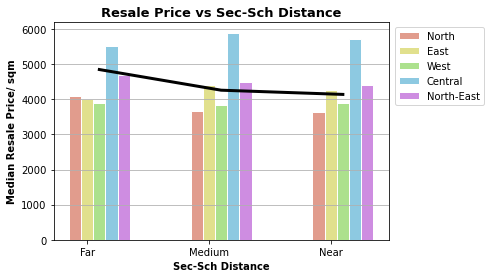

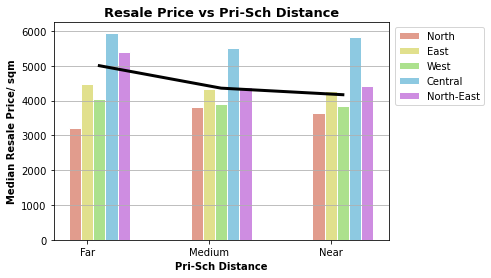

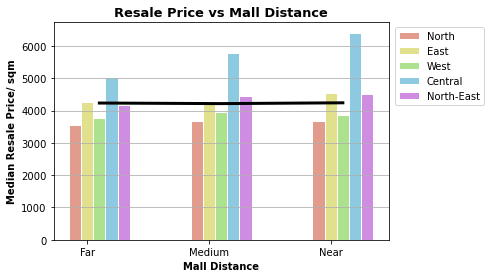

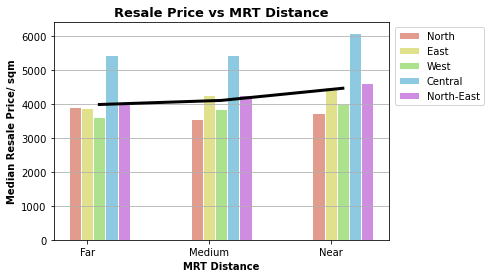

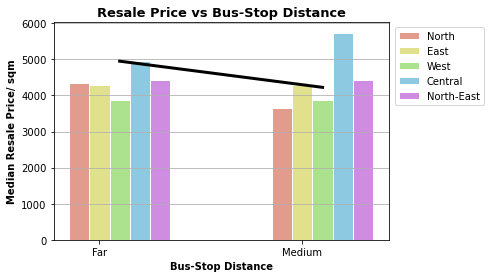

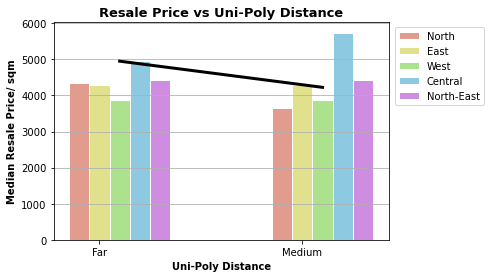

In [14]:
for col_name in distance_classfication:
    barWidth = 0.10

    bars_N = (North.groupby([col_name]).median())['price_per_sqm']
    bars_E = (East.groupby([col_name]).median())['price_per_sqm']
    bars_W = (West.groupby([col_name]).median())['price_per_sqm']
    bars_C = (Central.groupby([col_name]).median())['price_per_sqm']
    bars_NE = (North_East.groupby([col_name]).median())['price_per_sqm']
    overall = (combined.groupby([col_name]).median())['price_per_sqm']

    r1 = np.arange(len(bars_N))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    r5 = [x + barWidth for x in r4]
    
    plt.figure()
    
    plt.bar(r1, bars_N, color='#E19C8D', width=barWidth, edgecolor='white', label='North')
    plt.bar(r2, bars_E, color='#E1E08D', width=barWidth, edgecolor='white', label='East')
    plt.bar(r3, bars_W, color='#ACE18D', width=barWidth, edgecolor='white', label='West')
    plt.bar(r4, bars_C, color='#8DC9E1', width=barWidth, edgecolor='white', label='Central')
    plt.bar(r5, bars_NE, color='#CE8DE1', width=barWidth, edgecolor='white', label='North-East')
    
    plt.plot(r3, overall, linewidth = 3, color = "#010101")
    
    plt.legend(loc = 'upper right', bbox_to_anchor=(1.3, 1))
    plt.ylabel('Median Resale Price/ sqm', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars_N))], ['Far', 'Medium', 'Near'])
    plt.grid(which = "major", axis = "y")
    title = "Resale Price vs " + (col_name.split("_"))[0] + " Distance"
    plt.title(title, fontsize = 13, fontweight = 'bold')
    x_label = (col_name.split("_"))[0] + " Distance"
    plt.xlabel(x_label, fontweight='bold')
    
plt.show()

In [13]:
## Data Visualisation - Regions & Count

In [6]:
counts = (combined.groupby("pri_sch_count").mean())['price_per_sqm']

pri_sch_count
0.0    4709.325718
1.0    4576.022352
2.0    4250.090477
3.0    4201.897584
4.0    4360.911924
Name: price_per_sqm, dtype: float64

In [18]:
counts_classfication = ['sec_sch_count', 'pri_sch_count', 
                          'mall_count', 'MRT_count',
                          'bus_stop_count', 'uni_Poly_count']

ValueError: shape mismatch: objects cannot be broadcast to a single shape

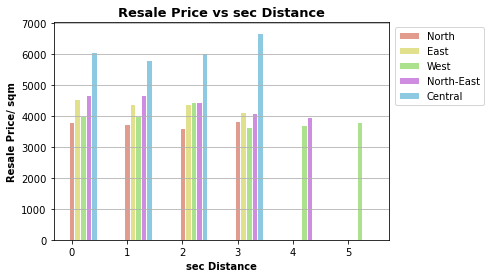

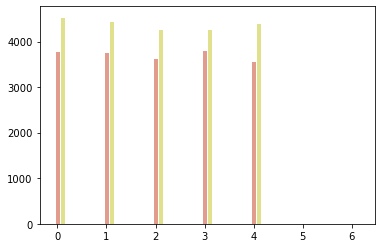

In [90]:
for col_name in counts_classfication:
    barWidth = 0.10

    bars_W = (West.groupby([col_name]).mean())['price_per_sqm']
    bars_N = (North.groupby([col_name]).mean())['price_per_sqm'].append(pd.Series([(0), (0)]), ignore_index = True)
    bars_E = (East.groupby([col_name]).mean())['price_per_sqm'].append(pd.Series([(0), (0)]), ignore_index = True)
    bars_C = (Central.groupby([col_name]).mean())['price_per_sqm'].append(pd.Series([(0), (0)]),ignore_index = True)
    bars_NE = (North_East.groupby([col_name]).mean())['price_per_sqm'].append(pd.Series([(0)]), ignore_index = True)
    #overall = (combined.groupby([col_name]).mean())['price_per_sqm']

    r1 = np.arange(len(bars_N))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    r5 = [x + barWidth for x in r4]
    
    plt.figure()
    
    plt.bar(r1, bars_N, color='#E19C8D', width=barWidth, edgecolor='white', label='North')
    plt.bar(r2, bars_E, color='#E1E08D', width=barWidth, edgecolor='white', label='East')
    plt.bar(r3, bars_W, color='#ACE18D', width=barWidth, edgecolor='white', label='West')
    plt.bar(r4, bars_NE, color='#CE8DE1', width=barWidth, edgecolor='white', label='North-East')
    plt.bar(r5, bars_C, color='#8DC9E1', width=barWidth, edgecolor='white', label='Central')
    
    #plt.plot(r3, overall, linewidth = 3, color = "#010101")
    
    plt.legend(loc = 'upper right', bbox_to_anchor=(1.3, 1))
    plt.ylabel('Resale Price/ sqm', fontweight='bold')
    #plt.xticks([r + barWidth for r in range(len(bars_N))], ['Far', 'Medium', 'Near'])
    plt.grid(which = "major", axis = "y")
    title = "Resale Price vs " + (col_name.split("_"))[0] + " Distance"
    plt.title(title, fontsize = 13, fontweight = 'bold')
    x_label = (col_name.split("_"))[0] + " Distance"
    plt.xlabel(x_label, fontweight='bold')
    
plt.show()

In [79]:
bars_W = (West.groupby([col_name]).mean())['price_per_sqm']
bars_N = (North.groupby([col_name]).mean())['price_per_sqm'].append(pd.Series([(0), (0)]), ignore_index = True)
bars_E = (East.groupby([col_name]).mean())['price_per_sqm'].append(pd.Series([(0), (0)]), ignore_index = True)
bars_C = (Central.groupby([col_name]).mean())['price_per_sqm'].append(pd.Series([(0), (0)]),ignore_index = True)
bars_NE = (North_East.groupby([col_name]).mean())['price_per_sqm'].append(pd.Series([(0)]), ignore_index = True)
#overall = (combined.groupby([col_name]).mean())['price_per_sqm']

In [80]:
type((North.groupby([col_name]).mean())['price_per_sqm'])

pandas.core.series.Series

In [87]:
barWidth = 0.10
r1 = np.arange(len(bars_W))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
bars_N

0    3791.413044
1    3731.836564
2    3620.844125
3    3846.153846
4       0.000000
5       0.000000
dtype: float64

<BarContainer object of 6 artists>

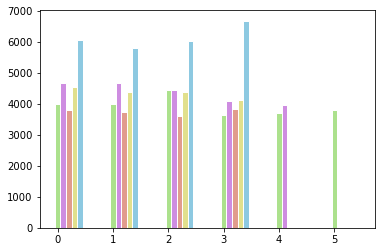

In [88]:
plt.bar(r1, bars_W, color='#ACE18D', width=barWidth, edgecolor='white', label='West')
plt.bar(r2, bars_NE, color='#CE8DE1', width=barWidth, edgecolor='white', label='North-East')
plt.bar(r3, bars_N, color='#E19C8D', width=barWidth, edgecolor='white', label='North')
plt.bar(r4, bars_E, color='#E1E08D', width=barWidth, edgecolor='white', label='East')
plt.bar(r5, bars_C, color='#8DC9E1', width=barWidth, edgecolor='white', label='Central')